# Introduction to Statistics in Python

## Chapter 2: Random Numbers and Probability

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import uniform, binom
import matplotlib.pyplot as plt

In [20]:
amir_deals = pd.read_csv("amir_deals.csv")
amir_deals

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


In [21]:
# Count the deals for each product
counts = amir_deals["product"].value_counts()

print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


In [22]:
# Calculate probability of picking a deal with each product
probs = counts/len(amir_deals)
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [23]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [24]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


In [25]:
restaurant_groups = pd.DataFrame(
    zip(
        ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
    ),
    columns=["group_id", "group_size"]
)

restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


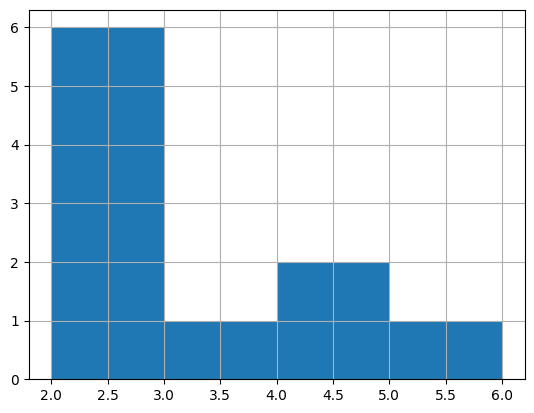

In [26]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [27]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [28]:
# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

2.9000000000000004


In [29]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist["group_size"] >=4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more["prob"])
print(prob_4_or_more)

0.30000000000000004


In [30]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [31]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [32]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1- uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


In [16]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


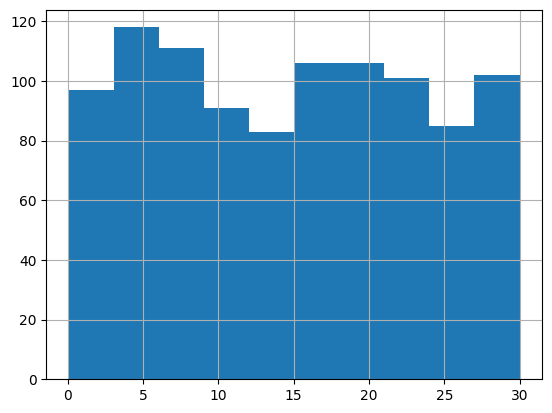

In [33]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
fig, ax = plt.subplots()
ax.hist(wait_times)
ax.grid()
plt.show()

In [34]:
# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


In [35]:
# Set random seed to 10
np.random.seed(10)

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

[1]


In [36]:
# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


In [37]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


In [38]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [39]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


Amir has about a 22% chance of closing more than one deal in a week.

In [40]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
